# Chapter 5. Applications

## 5.1 Linear Algebra

### 5.1.1 Solving a linear system

In [2]:
import numpy as np
from numpy.linalg import solve

A = np.array([[5, -3, 2], [-3, 8, 4], [2, 4, -9]], dtype=float)
b = np.array([10, 20, 9], dtype=float)
x = solve(A, b)
print x
c = np.dot(A, x)
print c

[ 3.44419134  3.19817768  1.18678815]
[ 10.  20.   9.]


## 5.1.2 Gaussian elimination

In [3]:
from sympy import symbols, Function, Matrix, init_printing

x, y, z, t = symbols('x y z t')          # Symbols representing real numbers
k, m, n = symbols('k m n', integer=True) # Symbols representing integers
f, g, h = symbols('f g h', cls=Function) # Symbols repesenting function names
init_printing()

A = np.array([[5, -3, 2], [-3, 8, 4], [2, 4, -9]], dtype=float)
b = np.array([[10], [20], [9]], dtype=float)
print A, b
C = np.concatenate((A, b), axis=1)
Cr = Matrix(C).rref()
print Cr

[[ 5. -3.  2.]
 [-3.  8.  4.]
 [ 2.  4. -9.]] [[ 10.]
 [ 20.]
 [  9.]]
(Matrix([
[1.0,   0,   0, 3.44419134396355],
[  0, 1.0,   0, 3.19817767653759],
[  0,   0, 1.0, 1.18678815489749]]), [0, 1, 2])


### 5.1.3 Finding eigenvalues and eigenvectors

In [4]:
A = np.array([[5, -3, 2], [-3, 8, 4], [4, 2, -9]], dtype=float)
[V, D] = np.linalg.eig(A)
print 'Eigenvalues\n', V
print 'Eigenvectors\n', D

Eigenvalues
[-10.22062687   4.42464106   9.7959858 ]
Eigenvectors
[[ 0.17254241  0.87060637 -0.53754162]
 [ 0.23822812  0.37738965  0.84287515]
 [-0.95575963  0.31562891 -0.02470826]]


### 5.1.4 Matrix factorizations

In [5]:
A = np.array([[5, -3, 2], [-3, 8, 4], [4, 2, -9]], dtype=float)
[Q, R] = np.linalg.qr(A)
print R

[[-7.07106781  4.38406204  5.37401154]
 [-0.         -7.60131568  2.04701405]
 [ 0.          0.         -8.24194962]]


In [6]:
[U, D, V] = np.linalg.svd(A)
print 'U =\n', U
print 'D =\n', D
print 'V =\n', V

U =
[[ 0.19746661  0.4956575   0.84577218]
 [-0.68275873 -0.54956546  0.48147515]
 [ 0.70345395 -0.67253361  0.22989366]]
D =
[ 11.44271549   8.82037309   4.38922325]
V =
[[ 0.51119203 -0.40615899 -0.75744147]
 [ 0.16290121 -0.81953034  0.5493935 ]
 [ 0.84388737  0.40423371  0.35277359]]


In [7]:
A = np.array([[5, -3, 2], [-3, 8, 4], [2, 4, 9]], dtype=float)
R = np.linalg.cholesky(A)
print R

[[ 2.23606798  0.          0.        ]
 [-1.34164079  2.48997992  0.        ]
 [ 0.89442719  2.08837026  1.95926253]]


## 5.2 Curve Fitting and Interpolation

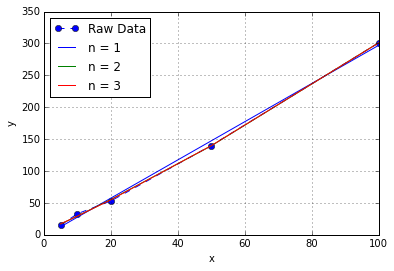

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array([5, 10, 20, 50, 100], dtype=float)
y = np.array([15, 33, 53, 140, 301], dtype=float)

p1 = np.polyfit(x, y, 1)
y1 = np.polyval(p1, x)

p2 = np.polyfit(x, y, 2)
y2 = np.polyval(p2, x)

p3 = np.polyfit(x, y, 3)
y3 = np.polyval(p3, x)

plt.plot(x, y, 'bo--', label='Raw Data')
plt.plot(x, y1, label='n = 1')
plt.plot(x, y2, label='n = 2')
plt.plot(x, y3, label='n = 3')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2)
plt.show()

## 5.4 Numerical Integration (Quadrature)

In [9]:
import scipy.integrate as spint

def erfcousin(x):
    return np.exp(-x**2)

y = spint.quad(erfcousin, 1/2.0, 3/2.0)
print y

(0.39490738721210866, 4.3843527387744516e-15)


### 5.4.1 Double integration

In [10]:
def f(x, y):
    return 1.0 - 6.0 * x**2 * y

I = spint.dblquad(f, 0, 2.0, lambda x : -1, lambda x : 1)
print I

(-3.9999999999999996, 5.55733536161384e-14)


## 5.5 Ordinary DIfferential Equations

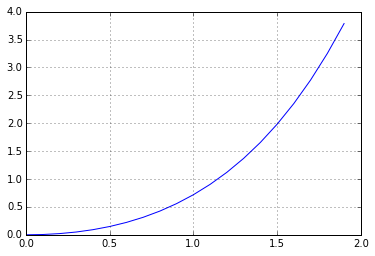

In [11]:
def simpmode(t, x):
    return x + t

t = np.arange(0, 2, 0.1)
x0 = 0
x = spint.odeint(simpmode, x0, t)

plt.plot(t, x)
plt.grid()
plt.show()

## 5.6 Nonlinear Algebraic Equations

Solve the following transcendental equation
$$\sin(x) = e^x - 5$$
Write the equation in standard form:
$$\sin(x) - e^x + 5 \Rightarrow f(x) = \sin(x) - e^x + 5$$

In [12]:
import scipy.optimize as spopt

def transf(x):
    return np.sin(x) - np.exp(x) + 5

r = spopt.newton(transf, 1)
print r, transf(r)

1.78784147462 1.01252339846e-13


### 5.6.1 Roots of polynomials

Polynomial equation
$$x^5 - 3x^3 + x^2 - 9 = 0$$
The coefficients are
$$(1) x^5 + (0) x^4 + (-3) x^3 + (1) x^2 + (0) x + (-9) = 0$$

In [13]:
p = np.poly1d([1, 0, -3, 1, 0, -9.0])
print p.r

[ 1.93160185+0.j          0.58983307+1.19342825j  0.58983307-1.19342825j
 -1.55563399+0.4573533j  -1.55563399-0.4573533j ]


In [14]:
print np.roots(p)

[ 1.93160185+0.j          0.58983307+1.19342825j  0.58983307-1.19342825j
 -1.55563399+0.4573533j  -1.55563399-0.4573533j ]
